<a href="https://colab.research.google.com/github/dnezan/km-sku-prediction/blob/main/KM_forecast_practice_monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KwickMetrics Forecast Practice**
Dinesh Sreekanthan<br>
https://github.com/dnezan/km-sku-prediction

# Data Overview
The dataset has 3 columns
<br>
*   SKU ID
*   Date
*   Number of items sold that day

By using the function `=COUNTUNIQUE(A:A)` in Google Spreadsheets or `Dataframe.unique()` in Pandas, we can find the number of unique items being sold. <br>

**There are 3786 unique items being sold over a period of about 1 year (01.01.2021 - 25.11.2021)**

# Setting up Cloud Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [3]:
!mkdir km-forecast-practice

mkdir: cannot create directory ‘km-forecast-practice’: File exists


In [4]:
%cd "/content/drive/My Drive/km-forecast-practice"

/content/drive/My Drive/km-forecast-practice


Make sure to move your dataset `km-forecast-practice.csv` to this folder.

In [5]:
!ls

amazon.com-2016-masked.csv	  graph.svg
amazon.com-2016-masked-datef.csv  graph_total.png
dataset_new.csv			  graph_total.svg
graph2.png			  km-forecast-practice-data.csv
graph3.png			  OLD_km-forecast-practice-data.csv
graph.png			  temppp.csv


In [6]:
import pandas as pd
import csv
import datetime

df=pd.read_csv('amazon.com-2016-masked-datef.csv')
df['timestamp']= pd.to_datetime(df['timestamp'])
print(df.dtypes)
df.head()

item_id                int64
timestamp     datetime64[ns]
demand                 int64
timestamp2            object
dtype: object


,item_id,timestamp,demand,timestamp2
0,93379,2016-05-01,1,2016-05
1,93379,2016-06-01,62,2016-06
2,93379,2016-07-01,17,2016-07
3,93379,2016-08-01,22,2016-08
4,93379,2016-09-01,49,2016-09


# Preprocessing the Data
The first step is to rearrange the data so that we have each column representing a day and the rows containing the SKU ID. <br> 
We must also populate the data with missing dates, which we assume have 0 items sold on that day. So the first step is to add the missing dates, then set these as 0.

In [9]:
from dateutil.relativedelta import *

start_date=df.timestamp[0].date()  
end_date=df.timestamp.iat[-1].date()
start_sku=df.item_id[1]
print('Start date is',start_date)
print('End date is',end_date)
print("First SKU is",start_sku)

data = [[start_sku, 0]]

# Populating the new dataset with first row
df_new = pd.DataFrame(data, columns = ['SKU', start_date])
x = start_date

index = 2
var=0
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
print("There are", num_months, "months between the two dates")

while var<num_months:
#  x+= datetime.timedelta(days=1)
  x = x + relativedelta(months=+1)
  df_new.insert(loc=index, column=x, value=0)
  index+=1
  var+=1
df_new.head()

Start date is 2016-05-01
End date is 2021-10-01
First SKU is 93379
There are 65 months between the two dates


,SKU,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01
0,93379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we add all the unique products and populate the Dataframe with 0s. (Takes a few minutes to complete)

In [10]:
print(df_new.shape[1]) #number of columns

uniqval = list(df.item_id.unique()) #list of unique products
uniqval.pop(0)

x=0
while x < len(uniqval):
  listofzeros = [0] * (num_months + 1)
  listofzeros.insert(0, uniqval[x])
  df_length = len(df_new)
  df_new.loc[df_length] = listofzeros
  x+=1
  if(x%200==0):
    print(x)

print(df_new)

67
       SKU  2016-05-01  2016-06-01  ...  2021-08-01  2021-09-01  2021-10-01
0    93379           0           0  ...           0           0           0
1    93380           0           0  ...           0           0           0
2    93386           0           0  ...           0           0           0
3    93391           0           0  ...           0           0           0
4    93498           0           0  ...           0           0           0
5    93499           0           0  ...           0           0           0
6    93505           0           0  ...           0           0           0
7    93506           0           0  ...           0           0           0
8    93508           0           0  ...           0           0           0
9    93565           0           0  ...           0           0           0
10   93567           0           0  ...           0           0           0
11   93699           0           0  ...           0           0           0
12   9374

Next we fill in the values of items that were actually sold on a given day.

In [11]:
uniqval.insert(0,start_sku)
#print(uniqval)

In [12]:
#Adding first product sales
count=-1
#while var<1000:
for y in uniqval:
  for x in df.item_id:
    if x == y: 
      count+=1
      z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
      z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
      df_new.iloc[z1,z] = df.demand[count]
      
print("This product was sold on",count,"days")
df_new.head()

#Adding the rest of the product sales 

This product was sold on 921 days


,SKU,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01
0,93379,1,62,17,22,49,55,128,18,46,41,59,52,95,37,47,37,44,28,114,314,16,52,54,41,57,32,55,54,37,51,119,332,27,34,47,36,66,41,42,63,52,53,113,360,67,44,48,115,86,113,106,136,198,94,558,338,209,156,156,97,126,177,121,165,123,53
1,93380,3,63,27,25,23,37,76,9,56,52,43,54,84,30,34,38,35,62,94,225,49,42,59,29,52,31,51,53,37,50,77,192,51,35,35,33,47,37,36,33,29,24,61,189,45,31,35,102,161,147,65,162,114,144,426,133,157,57,162,133,150,154,160,253,97,12
2,93386,0,0,0,0,3,6,22,1,22,22,32,27,41,21,29,18,16,23,57,194,22,19,36,25,39,27,40,36,49,33,43,169,23,24,30,35,38,27,51,28,33,37,65,214,53,41,29,115,172,152,117,108,110,188,370,172,151,102,115,101,105,106,91,90,76,38
3,93391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,22,19,9,32,16,36,98,15,23,46,66,125,62,48,53,57,33,82,85,27,26,23,138,196,80,109,107,102,152,314,65,104,47,132,96,124,110,77,145,98,31
4,93498,11,9,44,131,97,215,611,44,362,180,257,236,320,149,157,134,134,136,280,794,204,190,292,260,248,206,224,257,225,208,316,583,104,126,198,297,152,204,205,229,154,151,288,759,233,185,148,708,702,727,689,961,880,1066,1523,2324,833,812,858,688,756,968,502,2609,1296,223


In [13]:
df_new.to_csv('dataset_new.csv')

# Visualisation
Here we can visualise the sales of the first product in our dataset over a year.


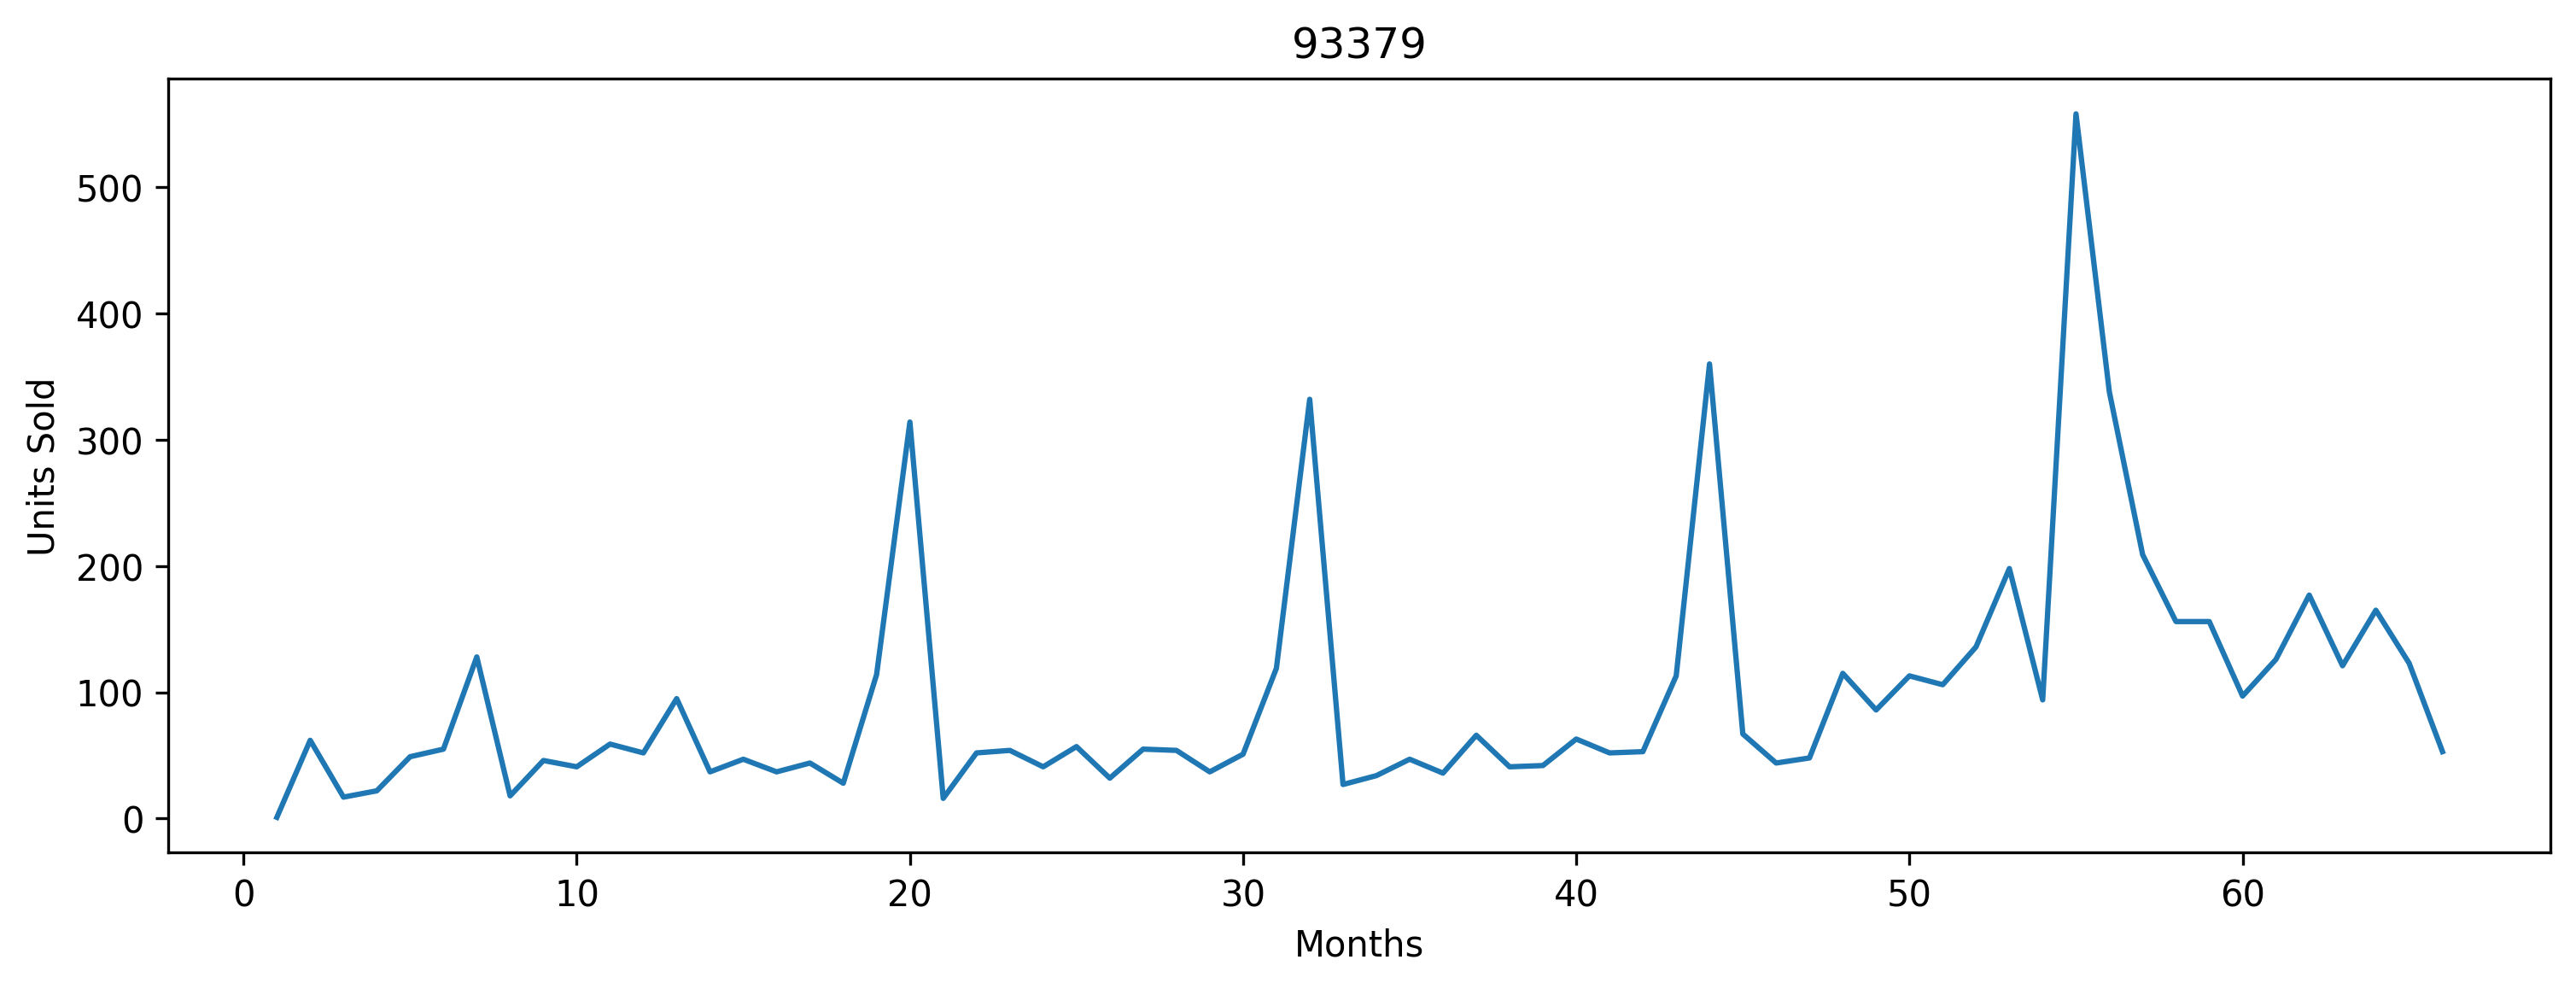

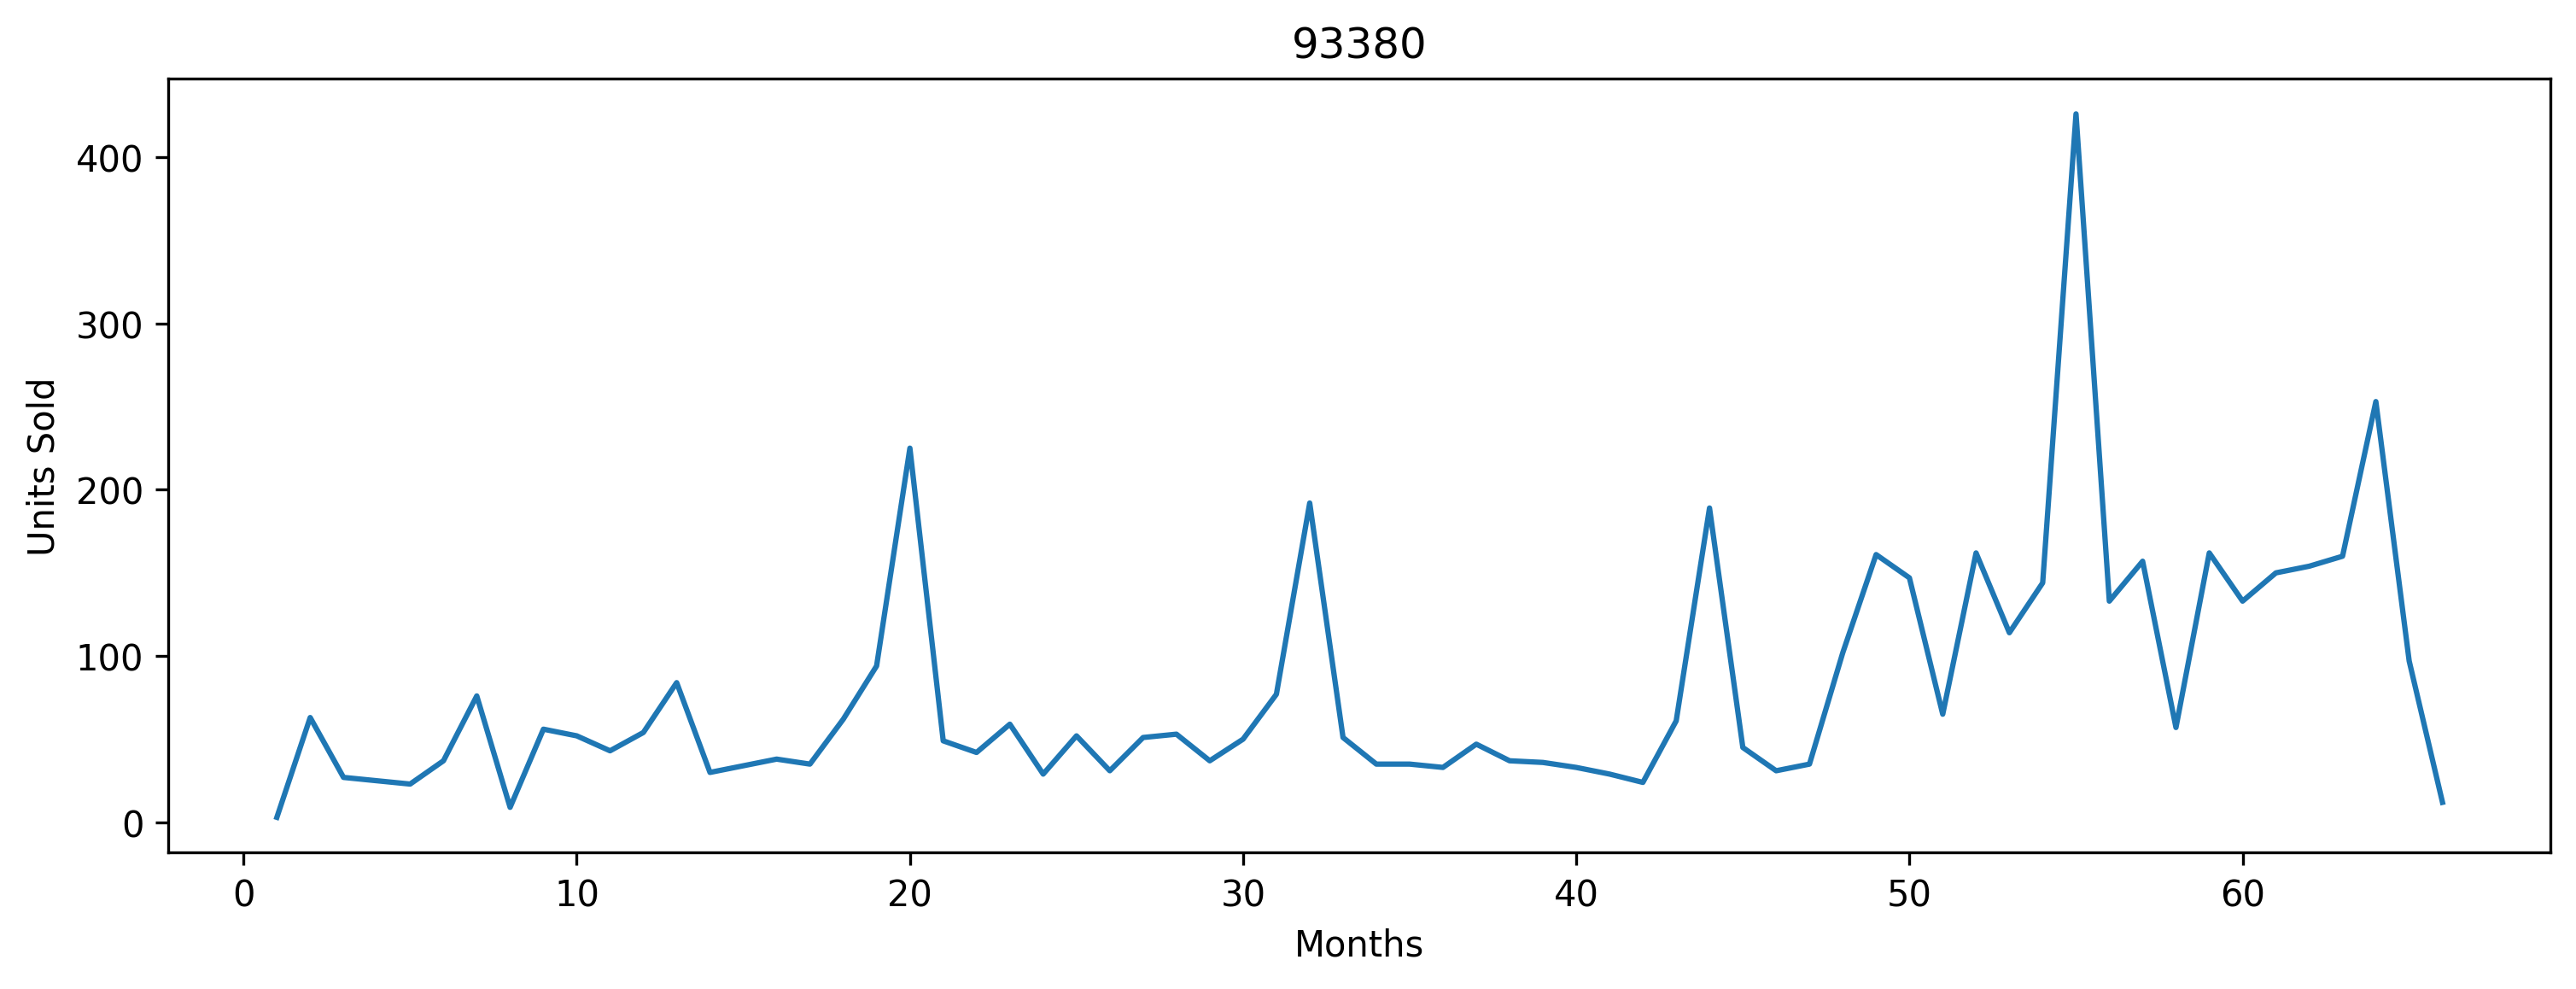

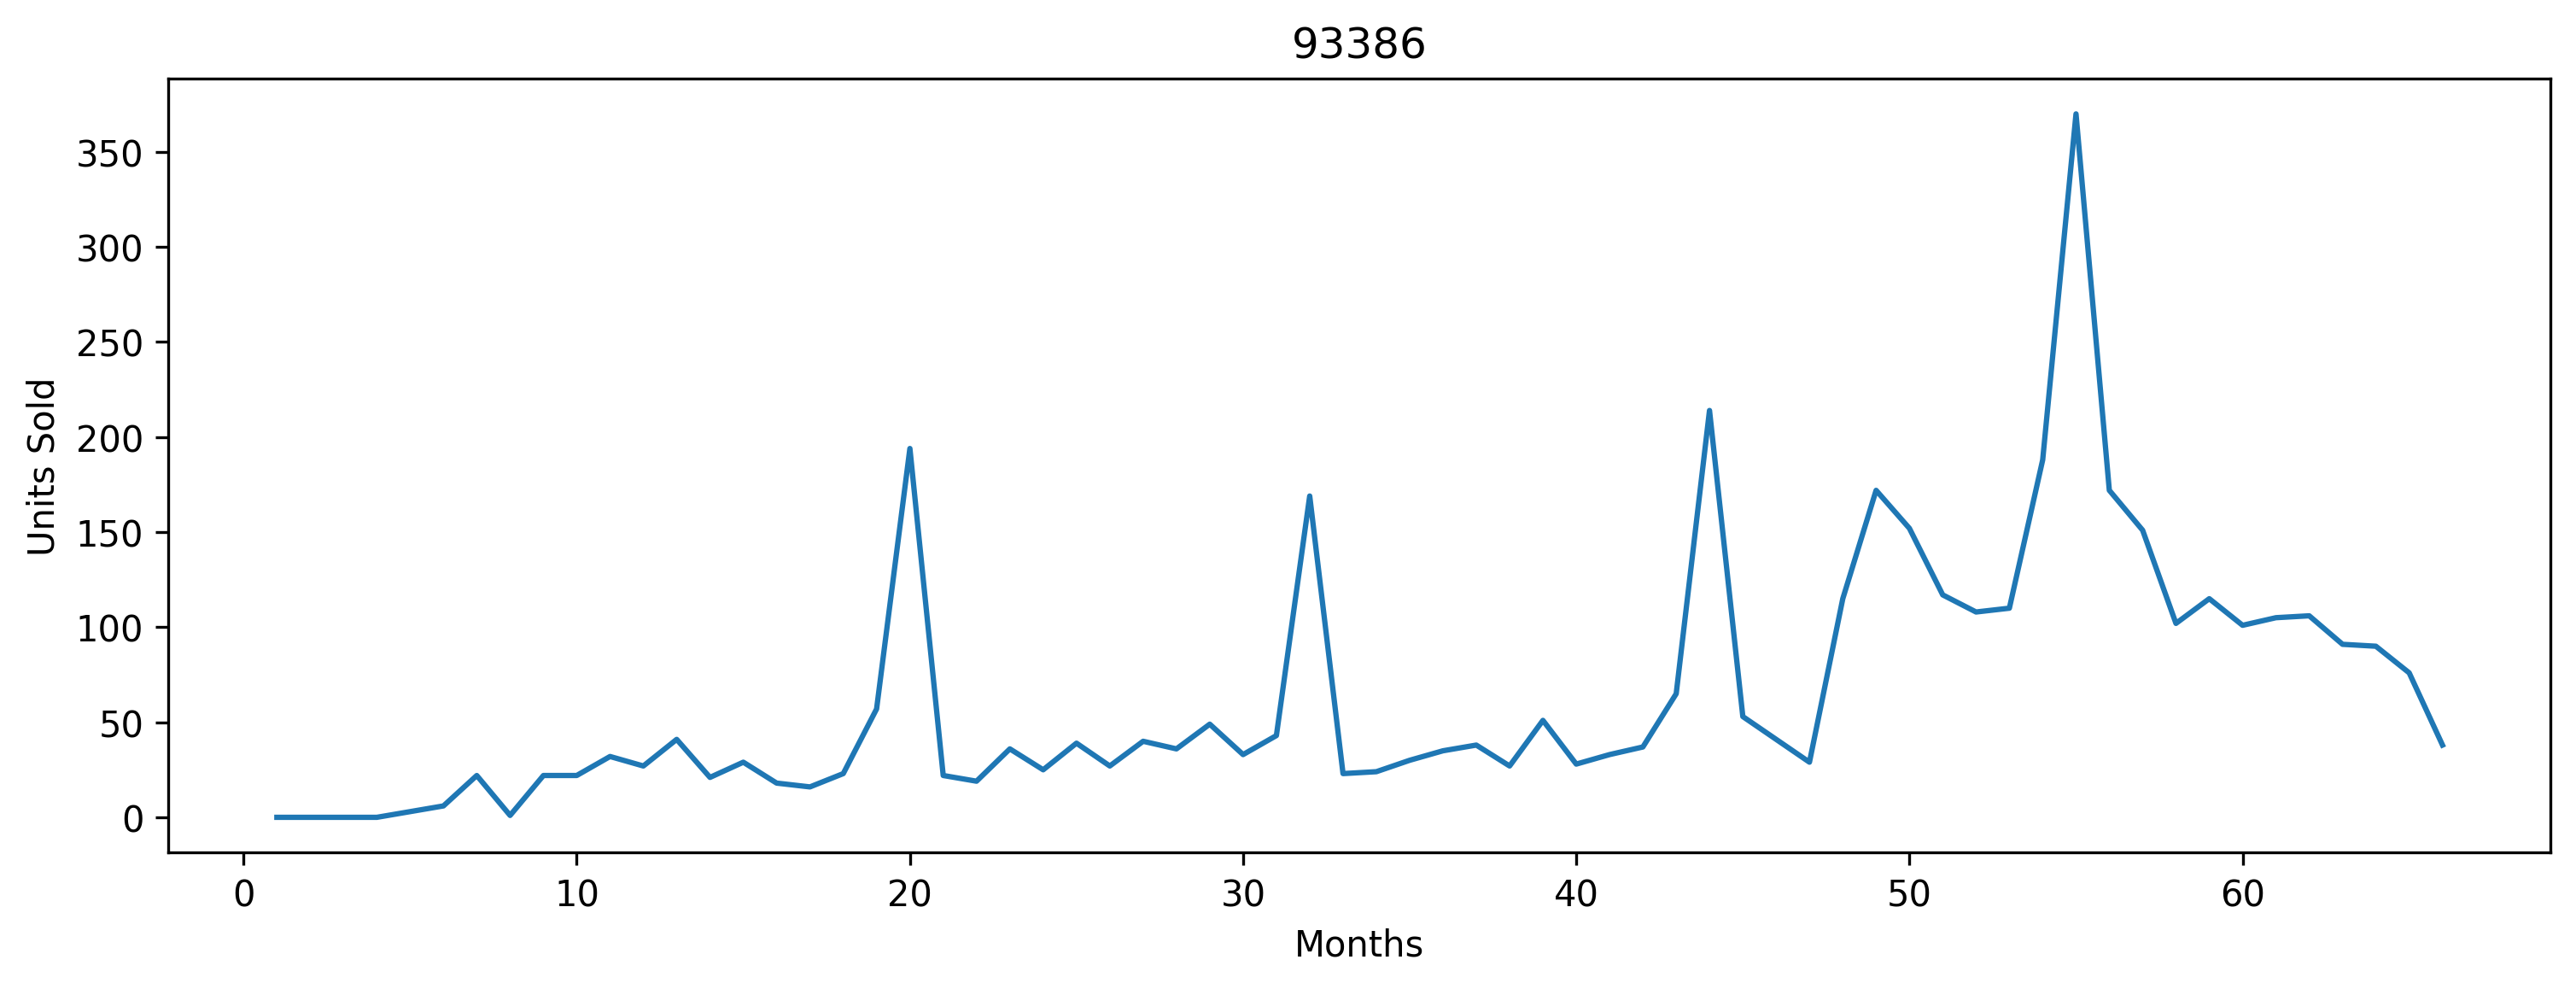

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#Enter random SKU here
a=0
b=1
c=2

##Plotting first product
temp = df_new.iloc[a].tolist()
del temp[0]

xpoints =range(1, (num_months+2))
xpoints=list(xpoints)
plotly_x=temp   ###################
f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)
plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[a])
#plt.xlim([0,365])
#plt.ylim([0,30])

##Plotting second product
temp = df_new.iloc[b].tolist()
del temp[0]
plotly_y = temp #####################
xpoints =range(1, num_months+2)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)

plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[b])
#plt.xlim([0,365])
#plt.ylim([0,100])

##Plotting third product
temp = df_new.iloc[c].tolist()
del temp[0]
plotly_z = temp ###################
xpoints =range(1, num_months+2)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)

plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[c])
#plt.xlim([0,365])

plt.savefig("graph_total.png") #PNG saved to Drive
plt.savefig("graph_total.svg") #Lossless SVG saved to Drive

plt.show()


In [20]:
import math
from math import log, floor
import pywt
from statsmodels.robust import mad
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(plotly_x)), mode='lines', y=plotly_x, marker=dict(color="darkgreen"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(plotly_y)), mode='lines', y=plotly_y, marker=dict(color="purple"), showlegend=False,
               name="Original signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(plotly_z)), mode='lines', y=plotly_z, marker=dict(color="navy"), showlegend=False,
               name="Original signal"),
    row=3, col=1
)
fig.update_layout(height=1200, width=800, title_text="Original sales")
fig.show()

# Wavelet Denoising (NOT NEEDED FOR MONTHLY)
DWT denoising https://en.wikipedia.org/wiki/Wavelet

In [21]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

temp = df_new.iloc[a].tolist()
del temp[0]
x_1=temp

temp = df_new.iloc[b].tolist()
del temp[0]
x_2=temp

temp = df_new.iloc[c].tolist()
del temp[0]
x_3=temp

y_w1 = denoise_signal(x_1)
y_w2 = denoise_signal(x_2)
y_w3 = denoise_signal(x_3)

#remove every negative value
del_var = 0
while del_var < len(y_w1):
  if y_w1[del_var]<0:
    y_w1[del_var] = 0
  del_var+=1

del_var = 0
while del_var < len(y_w2):
  if y_w2[del_var]<0:
    y_w2[del_var] = 0
  del_var+=1

del_var = 0
while del_var < len(y_w3):
  if y_w3[del_var]<0:
    y_w3[del_var] = 0
  del_var+=1

#plotting the subplots
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines', y=x_1, marker=dict(color="mediumaquamarine"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_w1, mode='lines', marker=dict(color="darkgreen"), showlegend=False,
               name="Denoised signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_w2, mode='lines', marker=dict(color="purple"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines', y=x_3, marker=dict(color="lightskyblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_w3, mode='lines', marker=dict(color="navy"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) sales")
fig.show()

# **Modeling**

# Splitting Train-Validation-Test Models<br>
We can choose to train on the first 90 days of the dataset and then predict the next 30 days after that. This prediction can be validated with our validation set of 30 days after the training dataset.

In [57]:
sales_train_val = pd.read_csv('dataset_new.csv')
ids = sorted(list(set(sales_train_val['SKU'])))
d_cols = [c for c in sales_train_val.columns]


train_range_start=2
train_range_end=64
validate_range_start=64
validate_range_end=68

train_dataset = sales_train_val[d_cols[train_range_start:train_range_end]]
val_dataset = sales_train_val[d_cols[validate_range_start:validate_range_end]]

print(train_dataset)
print(val_dataset)

    2016-05-01  2016-06-01  2016-07-01  ...  2021-04-01  2021-05-01  2021-06-01
0            1          62          17  ...          97         126         177
1            3          63          27  ...         133         150         154
2            0           0           0  ...         101         105         106
3            0           0           0  ...          96         124         110
4           11           9          44  ...         688         756         968
5           12           8          46  ...         156         161         196
6            0           0           0  ...         119         139         117
7            0           0           0  ...         154           9         163
8            0           0           0  ...          84         107          85
9            4           3           4  ...          33          33          36
10           0           0           0  ...         106         133         141
11           0           0           0  

# Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Train:
          ds   y
0 2016-05-01   1
1 2016-06-01  62
2 2016-07-01  17
3 2016-08-01  22
4 2016-09-01  49
5 2016-10-01  55
HOLIDAYS LIST:


/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                     Maundy Thursday
5                                Holi
6                              Mawlid
7                         Eid al-Fitr
8              Feast of the Sacrifice
9                      New Year's Day
10                        Palm Sunday
11                        Good Friday
12                      Easter Sunday
13                 Feast of Pentecost
14    Fest of St. Theresa of Calcutta
15        Feast of the Blessed Virgin
16                     All Saints Day
17                      All Souls Day
18                      Christmas Day
19                         Boxing Day
20               Feast of Holy Family
21                      Day of Ashura
dtype: object

Test:
          ds
0 2021-07-01
1 2021-08-01
2 2021-09-01
3 2021-10-01


/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030




Forecast:
          ds        yhat  yhat_lower  yhat_upper
0 2021-07-01  178.052162  153.919176  204.043181
1 2021-08-01  216.787745  190.115864  241.680559
2 2021-09-01  260.959729  234.714388  283.163795
3 2021-10-01  174.269124  148.565326  199.389192



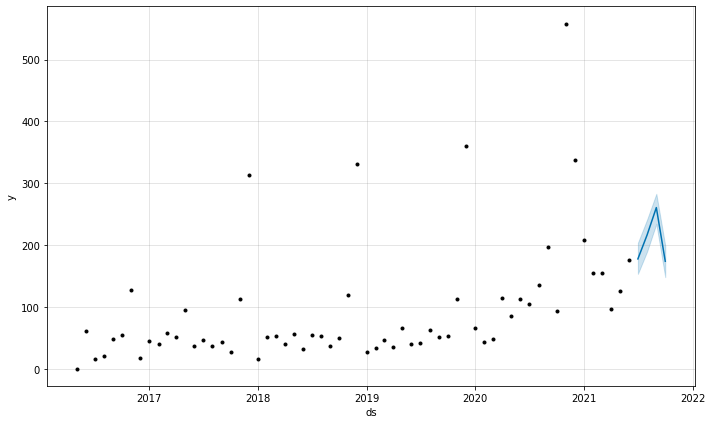

In [67]:
from fbprophet import Prophet
from pandas import to_datetime

predictions = []
temp = train_dataset.iloc[a]
temp2 = train_dataset.columns
temp3 = val_dataset.columns

df_x = pd.DataFrame(np.transpose([temp2, temp]))
df_x.columns = ["ds", "y"]
df_x["ds"]= to_datetime(df_x["ds"])
print("")
print("Train:")
print(df_x.head(6))

#holidays = pd.DataFrame({
#  'holiday': 'playoff',
#  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
#                        '2010-01-24', '2010-02-07', '2011-01-08',
#                        '2013-01-12', '2014-01-12', '2014-01-19',
#                        '2014-02-02', '2015-01-11', '2016-01-17',
#                        '2016-01-24', '2016-02-07']),
#  'lower_window': 0,
#  'upper_window': 1,
#})

model = Prophet(seasonality_mode='multiplicative') #hoiidays=holidays
model.add_country_holidays(country_name='IN')
print("HOLIDAYS LIST:")
model.fit(df_x)
print(model.train_holiday_names)

future = temp3
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

#m = Prophet(seasonality_mode='multiplicative').fit(df_x)
#future = m.make_future_dataframe(periods=4 , freq='M')
#print("future is", future)
#fcst = m.predict(future)
#fig = m.plot(fcst)

print("")
print("Test:")
print(future.head(6))
forecast = model.predict(future)

print("")
print("Forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(6))
print("")

#plot forecast
model.plot(forecast)
plt.show()

[121, 165, 123, 53]
[178.05216221 216.78774473 260.95972884 174.26912386]


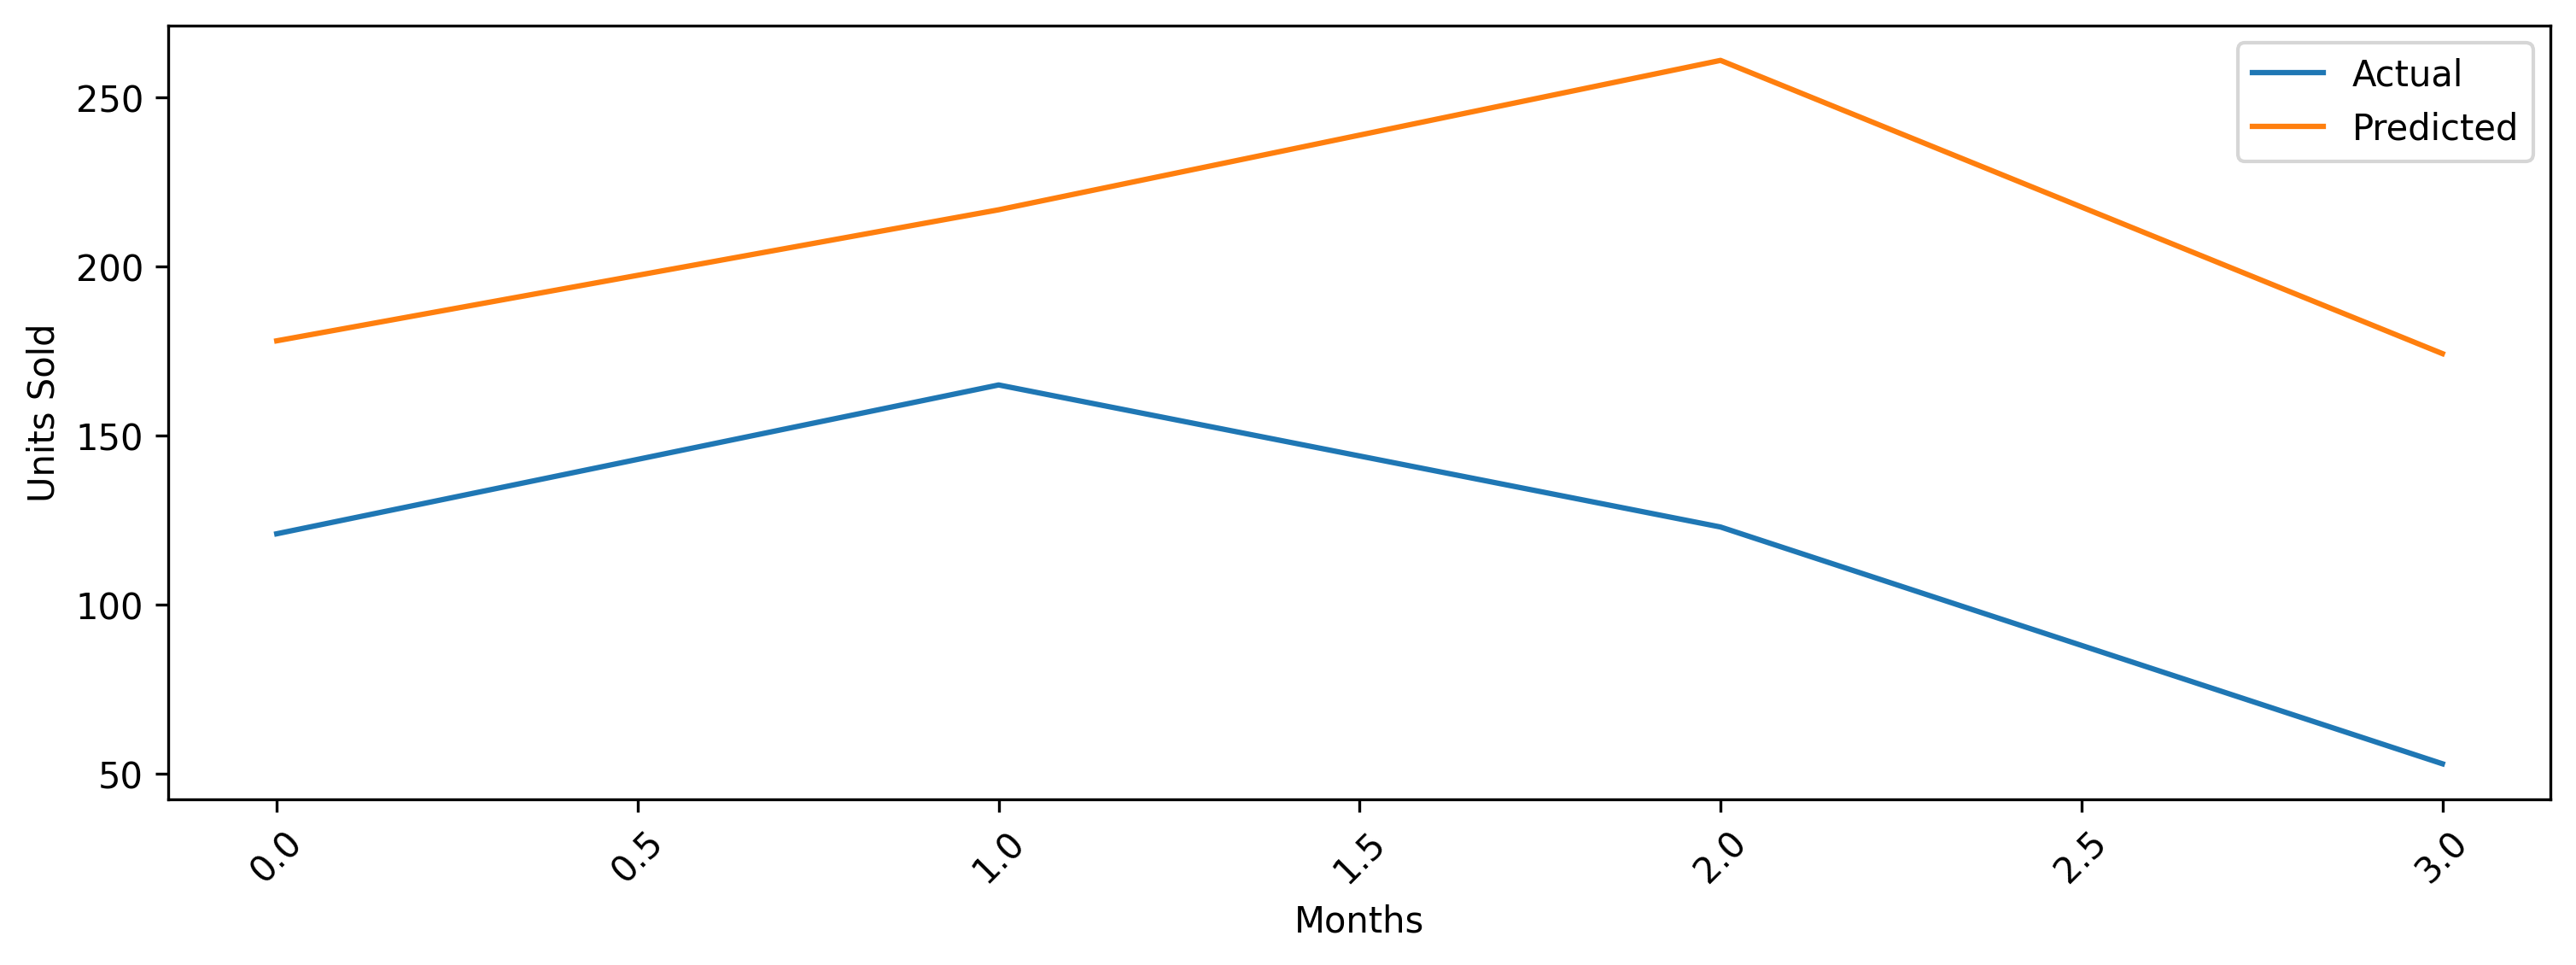

In [68]:
y_pred = forecast['yhat'].values
y_true = val_dataset.iloc[a]
y_true = y_true.tolist()
f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
print(y_true)
print(y_pred)
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [69]:
#fig = model.plot_components(forecast)